<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:
The input layer is the only layer that is exposed to our raw data. It will pass information further into the network and has weights and bias applied to it over time as the network updates. The number of input layers is associated with the number of variables.
### Hidden Layer:
A hidden layer is any layer that is not an input or output layer. This is part of what makes neural networks "black box" type solutions as we do not investigate the changes in the weights in these layers. They do apply transformations though that over epochs will increase the efficiency of our models
### Output Layer:
The final layer of a network, will have a transformation function applied to it so it can properly address the target the network is attempting to solve.
### Neuron:
A node within the neural network, it can be on any layer of the network, and represents where a transformation occurs of the data.
### Weight:
A vector transformation applied to the neuron, iterated overtime and is a source of optimization of a neural network over epochs.
### Activation Function:
A transformtaion applied ot the output layer. There are many types such as a stepwise (binary) as well as sigmoid (similar to a logistic regression) and tanh which has a steeper center portion of the curve than the sigmoid. It only determins if that given node will activate the next portion of a neural network, conrolling how much ifnormation is passed downstream within the network.
### Node Map
A visual representation of how each layer of the network interacts with the others.
### Perceptron:
The simpliest neural network. A single node with no hidden layers, it can take any number of inputs and at this simplest level looks very similar to linear regression.


## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Data enters a neural network through the input nodes. Depending on the type of nerual network there may be additional layers called hidden layers. Each layer of the network will have weights and biases applied to them. A weight is a vector that is applied to the node by multiplication, and bias is an additaional kind of weight but is a static value instead of a vector transformation. Finally when the data arrives to the final node in the network, the output node, an activation function is applied which then makes a final transformation of the data to determine if the neuron fires or not, or depending on the function, some percentage (sigmoid) of the information is to be passed further on downstream into the network.

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [2]:
import pandas as pd
data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')
df

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [17]:
#remember, the final column of all 1's represents our "bias" value
inputs = np.array([
    [0,0,1],
    [1,0,1],
    [0,1,1],
    [1,1,1]
])

correct_outputs = [[1],[1],[1],[0]]

In [18]:
##### Your Code Here #####

import numpy as np
#defining our sigmoid functions for our activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)


In [19]:
#generating weights between 0 and 1
weights = 2 * np.random.random((3,1)) - 1
weights

array([[ 0.50218023],
       [-0.53708896],
       [ 0.14244743]])

In [21]:
#applying our weights to our input values
weighted_sum = np.dot(inputs,weights) 
weighted_sum

array([[ 0.14244743],
       [ 0.64462766],
       [-0.39464154],
       [ 0.1075387 ]])

In [22]:
#with our weights applied, we can enter our output layer with a sigmoid function
activated_output = sigmoid(weighted_sum)

In [24]:
#then we can find the error on the output and our true values
error = correct_outputs - activated_output
error

array([[ 0.46444824],
       [ 0.3442012 ],
       [ 0.59739955],
       [-0.5268588 ]])

In [25]:
#with our error values measured we can make adjustments, using gradient descent and backpropogation
adjustments = error * sigmoid_derivative(activated_output)
adjustments

array([[ 0.10816877],
       [ 0.07742325],
       [ 0.14345778],
       [-0.12298117]])

In [26]:
#with the adjustments determined, we can apply them to our original weights
weights += np.dot(inputs.T,adjustments)

In [27]:
weights

array([[ 0.45662232],
       [-0.51661235],
       [ 0.34851606]])

In [28]:
#now we can iterate across this to increase our accuracy
for iteration in range(10000):
    
    # Weighted sum of inputs / weights
    weighted_sum = np.dot(inputs, weights)
    
    # Activate!
    activated_output = sigmoid(weighted_sum)
    
    # Cac error
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(activated_output)
    
    # Update the Weights
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[-11.83977024]
 [-11.83977024]
 [ 17.80851995]]
Output after training
[[0.99999998]
 [0.99744883]
 [0.99744883]
 [0.00281235]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [29]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [150]:
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

feats = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'bias']
target = 'Outcome'
diabetes['bias'] = np.ones(diabetes.shape[0])

#converting our pandas dataframe into split numpy arrays into features and target
X = diabetes[feats].to_numpy()
y = diabetes[target].to_numpy()
y = y * 2 - 1


In [151]:
#Nueral Networks typically work with standardized data so we should apply a transformation to our features for more efficient models

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)




In [157]:
##### Update this Class #####

class Perceptron(object):
    
    def __init__(self, rate = 0.1, niter = 10):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
        
        return 1 / (1 + np.exp(-X))
    
    def __sigmoid_derivative(self, x):
        sx = self.__sigmoid(X)
        return sx * (1-sx)

    def fit(self, X, y):
        """
        Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """
        
        
        
        # Randomly Initialize Weights
        #assign weights of 0 for the length of features + 1 (bias)
        self.weight = np.zeros(1 + X.shape[1])
        
            
        #initialize errors
        self.errors = []


        for i in range(self.niter):
            #reset errors for function calling
            err = 0
            for xi, target in zip(X, y):
                #the delta for each pass
                delta_w = self.rate * (target - self.predict(xi))
                # Weighted sum of inputs / weights
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
                self.errors.append(err)
        return self


    def predict(self, X):
        """Return class label after unit step"""
        #takes dot product for all of the inputs and the optimized weights plus the bias (first value in the weights vector)
        return np.dot(X, self.weight[1:]) + self.weight[0]

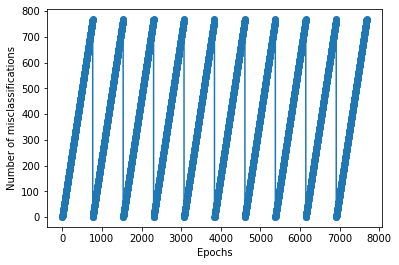

In [161]:
#initializating the perceptron class
import matplotlib.pyplot as plt

nn = Perceptron()

#fitting on the diabetes data
nn.fit(X_scaled,y)
plt.plot(range(1, len(nn.errors) + 1), nn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?